# Selected Model

In the previous workbook, we selected the Random Forrest Model (RF). Now that we've completed our analysis of the data, we can evaluate the selected model and determine if it effectively fulfills our problem statement

#### Library Imports


In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import requests
import pickle
import seaborn as sns

from pandas import json_normalize
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.pipeline import Pipeline
from sklearn.naive_bayes import MultinomialNB
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay
from sklearn.feature_extraction.text import CountVectorizer, TfidfVectorizer
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay,roc_auc_score, roc_curve, auc

from sklearn.preprocessing import normalize
from sklearn.svm import SVC

####  Data Imports

In [2]:
with open('pickles/df_text.pkl', 'rb') as f:
    df_text = pickle.load(f)

with open('pickles/y_score.pkl', 'rb') as f:
    y_score = pickle.load(f)
    
with open('pickles/y_score_nb.pkl', 'rb') as f:
    y_score_nb = pickle.load(f)
    
with open('pickles/y_score_svm.pkl', 'rb') as f:
    y_score_svm = pickle.load(f)
    
with open('pickles/y_pred_rf.pkl', 'rb') as f:
    y_pred_rf = pickle.load(f)
    
with open('pickles/y_test_rf.pkl', 'rb') as f:
    y_test_rf = pickle.load(f)

with open('pickles/y_pred_nb.pkl', 'rb') as f:
    y_pred_nb = pickle.load(f)
    
with open('pickles/y_pred_svm.pkl', 'rb') as f:
    y_pred_svm = pickle.load(f)
    
with open('pickles/y_test_nb.pkl', 'rb') as f:
    y_test_nb = pickle.load(f)
    
with open('pickles/y_test_svm.pkl', 'rb') as f:
    y_test_svm = pickle.load(f)
    
with open('pickles/top_words.pkl', 'rb') as f:
    top_words = pickle.load(f)
    
with open('pickles/word_freq.pkl', 'rb') as f:
    word_freq = pickle.load(f)
    
with open('pickles/top_words_0.pkl', 'rb') as f:
    top_words_0 = pickle.load(f)
    
with open('pickles/top_words_1.pkl', 'rb') as f:
    top_words_1 = pickle.load(f)

with open('pickles/top_freqs_0.pkl', 'rb') as f:
    top_freqs_0 = pickle.load(f)
    
with open('pickles/top_freqs_1.pkl', 'rb') as f:
    top_freqs_1 = pickle.load(f)
    
with open('pickles/word_freq_0.pkl', 'rb') as f:
    word_freq_0 = pickle.load(f)
    
with open('pickles/word_freq_1.pkl', 'rb') as f:
    word_freq_1 = pickle.load(f)


In [3]:
# Score imports

# Naive Bayes
with open('pickles/accuracy.pkl', 'rb') as f:
    accuracy = pickle.load(f)
    
with open('pickles/precision.pkl', 'rb') as f:
    precision = pickle.load(f)
    
with open('pickles/recall.pkl', 'rb') as f:
    recall = pickle.load(f)
    
with open('pickles/f1.pkl', 'rb') as f:
    f1 = pickle.load(f)
    

# Support Vector Machine    
with open('pickles/accuracy_svm.pkl', 'rb') as f:
    accuracy_svm = pickle.load(f)
    
with open('pickles/precision_svm.pkl', 'rb') as f:
    precision_svm = pickle.load(f)
    
with open('pickles/recall_svm.pkl', 'rb') as f:
    recall_svm = pickle.load(f)
    
with open('pickles/f1_svm.pkl', 'rb') as f:
    f1_svm = pickle.load(f)
    

# Random Forrest
with open('pickles/accuracy_rf.pkl', 'rb') as f:
    accuracy_rf = pickle.load(f)
    
with open('pickles/precision_rf.pkl', 'rb') as f:
    precision_rf = pickle.load(f)
    
with open('pickles/recall_rf.pkl', 'rb') as f:
    recall_rf = pickle.load(f)
    
with open('pickles/f1_rf.pkl', 'rb') as f:
    f1_rf = pickle.load(f)


## Selected Model

The Random Forrest Model was selected as it provided accurate and precise results while maintaing adequate recall in relation to the other models tested.

| Model         | Accuracy | Precision | Recall | F1 Score |
|---------------|----------|-----------|--------|----------|
| Random Forest| 0.904    | 0.910     | 0.897  | 0.903  |
| LinearSVC     | 0.820    | 0.821     | 0.826  | 0.823    |
| NB            | 0.872    | 0.944     | 0.792  | 0.861    |


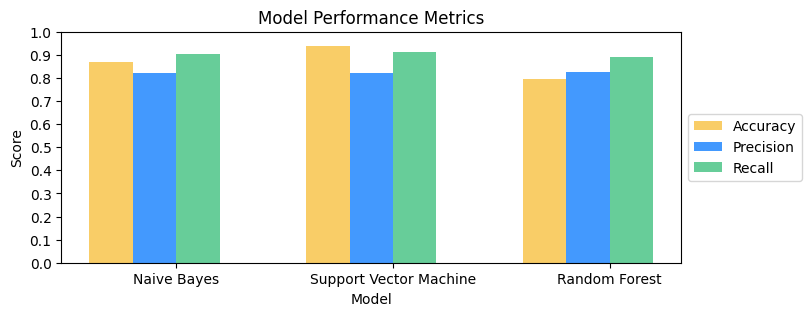

In [4]:
bar_width = 0.2
spacing = 0.0
models = ['Naive Bayes', 'Support Vector Machine', 'Random Forest']
ind = np.arange(len(models))

nb_metrics = [accuracy, precision, recall, f1][:-1]
rf_metrics = [accuracy_rf, precision_rf, recall_rf, f1_rf][:-1]
svm_metrics = [accuracy_svm, precision_svm, recall_svm, f1_svm][:-1]

fig, ax = plt.subplots(figsize=(8, 3))
colors = ['#F9CD67', '#4399FE', '#67CD99', '#F24954']
labels = ['Accuracy', 'Precision', 'Recall', 'F1 Score']
for i, metric in enumerate([nb_metrics, svm_metrics, rf_metrics]):
    ax.bar(ind - (1.5*bar_width + spacing) + i*bar_width, metric, width=bar_width, color=colors[i], label=labels[i])
    ax.set_xticks(ind)
    ax.set_xticklabels(models)
    ax.set_xlabel('Model')
    ax.set_ylabel('Score')
    ax.set_yticks(np.arange(0, 1.1, 0.1))

ax.set_title('Model Performance Metrics')
ax.legend(loc='center left', bbox_to_anchor=(1, 0.5))
plt.show()

Because our client is interested in this data for the purposes of tailoring their advertising towards these distinct customer groups, accuracy and precision were valued at a premium.

The accuracy of our model denotes the ratio between the number of correct predictions and the total number of predictions made. For our client, an inaccurate model corresponds with poorly targeted advertising.

Each inaccurate prediction made by our client is ad revenue spent targeting a customer that isn't interested in the language their advertisement is using and therefore it is pertinent that our model correctly predict the subreddit specific text is associated with.


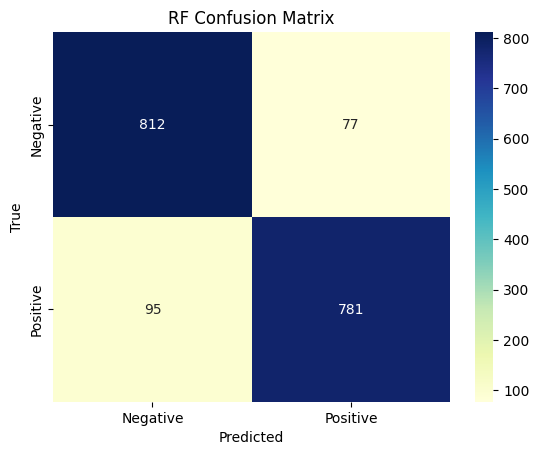

In [5]:
cm = confusion_matrix(y_test_rf, y_pred_rf)
sns.heatmap(cm, annot=True, cmap='YlGnBu',xticklabels=['Negative', 'Positive'], 
            yticklabels=['Negative', 'Positive'],fmt='g')

plt.xlabel('Predicted')
plt.ylabel('True')
plt.title('RF Confusion Matrix')

plt.show()

The precision of our model denotes the ratio between correctly predicted positive instances and total number of positive predictions. This value includes the number of falsely predicted true values and the accurately predicted true values.

In practice, this value tells us how often our model produces false positives, or, the number of times our model gets a positive prediction wrong.

For our client, they are building an ad campaign that is expected to be effective in targeting a specific client. If they are expecting to receive a positive response to their advertisement for clients that are targeted by the correct ad, a False positive could lead the client to believe that their advertising strategy is subpar. The reality is simply that their advertising was shown to the wrong customer.

This is why the selection of our model was determined primarily by these two metrics, as they both provide insight into how well our client can expect to perform in the market.

#### Comparison to Other Models

After running the analysis, the comparison was between the Random Forrest Model and the Naive Bayes model. This is because the Linear SVC model did not perform well and therefore was not considered.

In comparison to the Naive Bayes model, the Random Forrest model performed on par with Naive Bayes in both precision and accuracy. The difference was the overall recall score, which negatively affected the overall F1 Score.

The F1 score is the harmonic mean of Recall and Precision and so either metric could negatively effect the score.

For The Naive Bayes model, it had the highest precision but also the lowest recall of our models. This resulted in a lower F1 Score than the Random Forrest Model.

A high precision, low recall model indicates that the model is too conservative in its predictions and potentially missing out on valuable information.

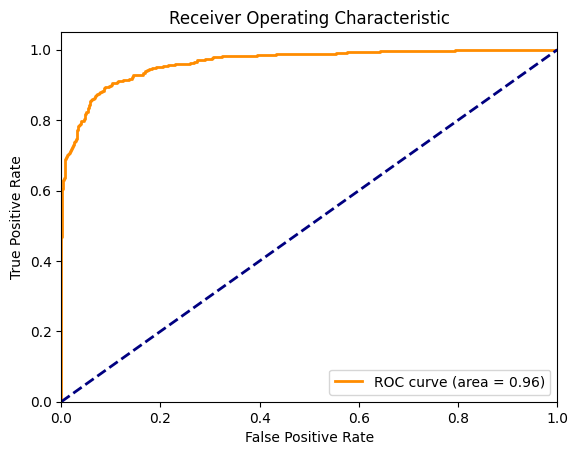

In [6]:
# assume y_true and y_score are the true labels and predicted scores, respectively
fpr, tpr, _ = roc_curve(y_test_rf, y_score)
roc_auc = auc(fpr, tpr)

# plot ROC curve
plt.figure()
plt.plot(fpr, tpr, color='darkorange', lw=2, label='ROC curve (area = %0.2f)' % roc_auc)
plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic')
plt.legend(loc="lower right")
plt.show()

As shown in the ROC curve above, the Random Forrest model is a very good classifier for the binary classification problem it has been trained on. 

The AUC represents the classifier's ability to distinguish between positive and negative classes, with 1 being a perfect classifier and 0.5 being equivalent to random guessing. An AUC of 0.96 suggests that the classifier has very high accuracy in distinguishing between the two classes.

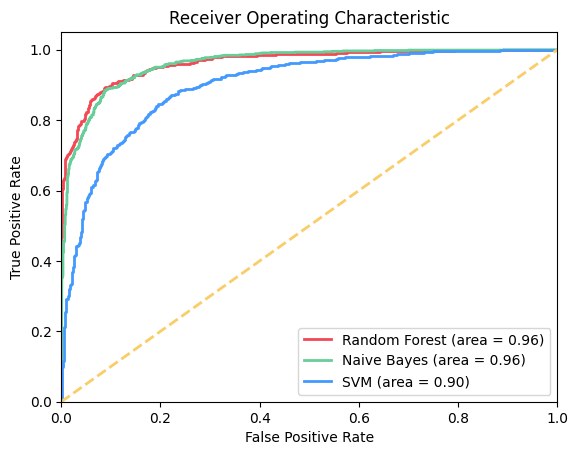

In [7]:
fpr_rf, tpr_rf, _ = roc_curve(y_test_rf, y_score)
roc_auc_rf = auc(fpr_rf, tpr_rf)

fpr_nb, tpr_nb, _ = roc_curve(y_test_nb, y_score_nb)
roc_auc_nb = auc(fpr_nb, tpr_nb)

fpr_svm, tpr_svm, _ = roc_curve(y_test_svm, y_score_svm)
roc_auc_svm = auc(fpr_svm, tpr_svm)

# plot ROC curves
plt.figure()
plt.plot(fpr_rf, tpr_rf, color='#F24954', lw=2, label='Random Forest (area = %0.2f)' % roc_auc_rf)
plt.plot(fpr_nb, tpr_nb, color='#67CD99', lw=2, label='Naive Bayes (area = %0.2f)' % roc_auc_nb)
plt.plot(fpr_svm, tpr_svm, color='#4399FE', lw=2, label='SVM (area = %0.2f)' % roc_auc_svm)
plt.plot([0, 1], [0, 1], color='#F9CD67', lw=2, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic')
plt.legend(loc="lower right")
plt.show()

An ROC curve is a graph that shows the trade-off between the true positive rate (sensitivity) and the false positive rate (1 - specificity) for different classification thresholds. The area under the ROC curve (AUC) is a metric that represents the overall performance of a binary classification model. An AUC of 1 represents a perfect model, while an AUC of 0.5 represents a random guess.

In our analysis, the Naive Bayes, Random Forrest, and SVM models all had high AUC scores, indicating their high accuracy in distinguishing between the two classes. The Naive Bayes and Random Forrest models had the same AUC score of 0.96, while the SVM model had a slightly lower score of 0.9. Overall, these scores suggest that all three models are effective in predicting the subreddit to which a particular text belongs to.

#### Comparison to Baseline

The baseline accuracy score for our data was .5 and all of our models beat the baseline by a significant margin. This result became more pronounced as more data was gathered.

### Sentiment Analysis

In addition to text data, our models were trained on VADER sentiment data. This data was generated by running a sentiment analysis on the text data pulled from each subreddit. 

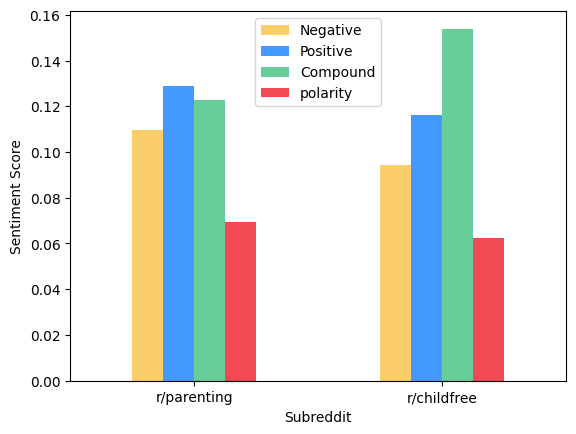

In [8]:
sentiment_means = df_text.groupby('subreddit')[['neg', 'pos', 'compound','polarity']].mean()

# define custom colors
colors = ['#F9CD67', '#4399FE', '#67CD99', '#F24954']

# create the bar graph
ax = sentiment_means.plot(kind='bar', color=colors)
ax.set_ylabel('Sentiment Score')
ax.set_xlabel('Subreddit')
ax.set_xticklabels(['r/parenting', 'r/childfree'],rotation=0)
ax.legend(['Negative', 'Positive', 'Compound','polarity'],loc = 'upper center')
plt.show()

The sentiment data is broken down into 4 categories: Positive (pos), Neutral (neu), Negative (neg), and Compound. For the purposes of this analysis, the above bar chart shows only postive, negative, and compound. This is because the sentiment from both subreddits was mostly neutral. By removing the neutral column, we can more clearly see the differences between the positive and negative sentiments in the data. 

The compound metric is a measure of the sum of all the lexicon ratings for the given dataset. The larger the compound score, the more 'positive' the general sentiment is.

A polarity score of -1 indicates a strongly negative sentiment, 0 indicates a neutral sentiment, and 1 indicates a strongly positive sentiment. The score is calculated by counting the number of positive and negative words in the text and taking the difference between the two, normalized by the total number of words. 

From the above plot, the childfree subreddit is generally, on aggregate, more positive than the Parenting subreddit, however further analysis would be needed to confirm this. This uncertainty is due to the difference in result in the polarity and compound scores, which are different methods of calculating the same thing. i.e.- the aggregate sentiment score of the text data.


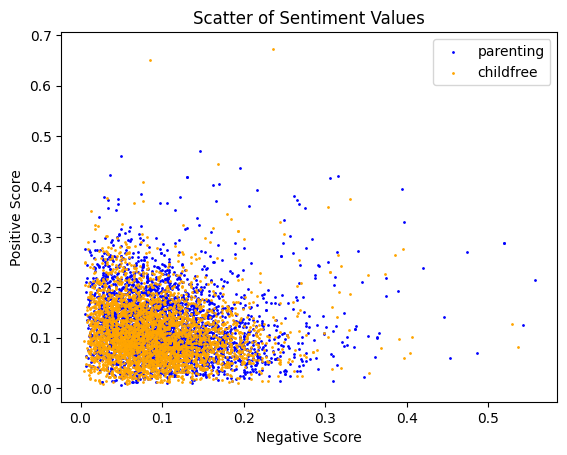

In [9]:
fig, ax = plt.subplots()
color_dict = {1: 'orange', 0: 'blue'}

# filter out rows with zero positive and negative scores
df_filtered = df_text[(df_text['pos'] != 0) & (df_text['neg'] != 0)]

# group the sentiment data by subreddit and plot a scatter plot for each group
for subreddit, group in df_filtered.groupby('subreddit'):
    ax.scatter(group['neg'], group['pos'], color=color_dict[subreddit], label=subreddit,s=1)

ax.set_xlabel('Negative Score')
ax.set_ylabel('Positive Score')
ax.legend(labels=['parenting', 'childfree'])
ax.set_title('Scatter of Sentiment Values')
plt.show()

The above plot shows a slight skew in the sentiment data for both subreddits, however it's clear that the majority of datapoints indicate that users are generally neutral in their responses.

The sentiment data is an important component of the analysis and its presence improved the accuracy of all 3 models. However it should be part of a comprehensive plan and used to determine the tone of the language you use in your advertising for the target group of customers.

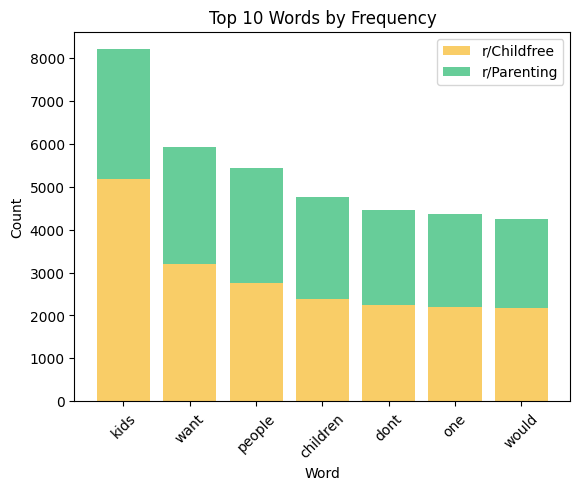

In [10]:
exclude_words = ['like', 'im', 'get']

top_words_0_filtered = [word for word in top_words_0 if word not in exclude_words][:15]
top_freqs_0_filtered = [freq for word, freq in zip(top_words_0, top_freqs_0) if word not in exclude_words][:15]

top_words_1_filtered = [word for word in top_words_1 if word not in exclude_words][:15]
top_freqs_1_filtered = [freq for word, freq in zip(top_words_1, top_freqs_1) if word not in exclude_words][:15]

# create a bar plot
fig, ax = plt.subplots()
ax.bar(range(len(top_words_0_filtered)), top_freqs_0_filtered, color='#F9CD67', label='r/Childfree')
ax.bar(range(len(top_words_1_filtered)), top_freqs_1_filtered, bottom=top_freqs_0_filtered, color='#67CD99', label='r/Parenting')
ax.set_xticks(range(len(top_words_0_filtered)))
ax.set_xticklabels(top_words_0_filtered, rotation=45)
ax.set_xlabel('Word')
ax.set_ylabel('Count')
ax.set_title('Top 10 Words by Frequency')
ax.legend()
plt.show()


The above barchart shows several frequently used words and is color coded by subreddit. This plot shows an interesting split in the usage of the words 'kids', 'people', and 'children'. Users of the Parenting subreddit are less likely to discuss their children on the subreddit in terms of 'kids' or 'children' and are more likely to use more colloqial terms to deseribe them.

# Executive Summary

Our NLP analysis on the two subreddits, r/childfree and r/parenting, has resulted in the development of a highly accurate and effective model using the Random Forrest algorithm. The model was specifically designed to predict the subreddit to which a particular text belongs to, and it was developed with a priority on accuracy and F1 score.

For our client, who is building an ad campaign targeting specific clients, our model selection was crucial in ensuring that their advertising strategy is tailored to the specific needs and preferences of each group. By targeting the right audience with the right advertising, our client can expect a positive response to their advertisement for clients that are targeted by the correct ad.

Our analysis also revealed that the sentiment in the childfree subreddit was generally more positive and less negative when compared to the parenting subreddit. This information can be incredibly useful for our client in tailoring their products and services to the specific needs and preferences of each group, and creating targeted advertising campaigns that resonate with their intended audience.

Overall, our model can help our client gain deeper insights into the language and tone preferred by each subreddit's users, which will be instrumental in developing effective marketing and product development strategies. By leveraging the power of natural language processing and machine learning, our client can stay ahead of the curve in understanding and catering to the distinct behaviors and preferences of customers who have children and those who do not.

# Recommendations

1. Use the insights gained from the sentiment analysis to tailor products and services for each subreddit's users. This can help improve customer satisfaction and loyalty.

2. Continue to use the Random Forest algorithm in future analyses as it proved highly effective in predicting the subreddit to which a particular text belongs to.

3. Collect and analyze more data from subreddits or other online communities to gain a deeper understanding of the language and tone preferred by different groups of customers.

4. Develop targeted advertising campaigns that resonate with the intended audience, based on the insights gained from the analysis. This can help improve the effectiveness of advertising campaigns and lead to increased sales and revenue.

# References

References:

1. SlidesGo (Presentation Template)
2. Reddit (https://www.reddit.com/)
3. Medium- Sentiment Analysis (https://medium.com/@kiddojazz/reddit-sentiment-analysis-f8a1a790124a)
4. Learn Data Sci (https://www.learndatasci.com/tutorials/sentiment-analysis-reddit-headlines-pythons-nltk/)
5. Modelling & NLP (https://dailynlp.com/nlp-modeling/)
6. PushShift API